In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("supplement.csv")
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [60]:
df.shape

(188340, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [32]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip('#')

In [22]:
df.head(1)

,id,store_id,store_type,location_type,region_code,date,holiday,discount,order,sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84


In [33]:
## Removing id column

df.drop('id', axis =1, inplace = True)

In [23]:
df.head(1)

,store_id,store_type,location_type,region_code,date,holiday,discount,order,sales
0,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84


In [28]:
df.isnull().sum()

store_id         0
store_type       0
location_type    0
region_code      0
date             0
holiday          0
discount         0
order            0
sales            0
dtype: int64

#### There are no missing values in data

In [30]:
df.describe()

,store_id,holiday,order,sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


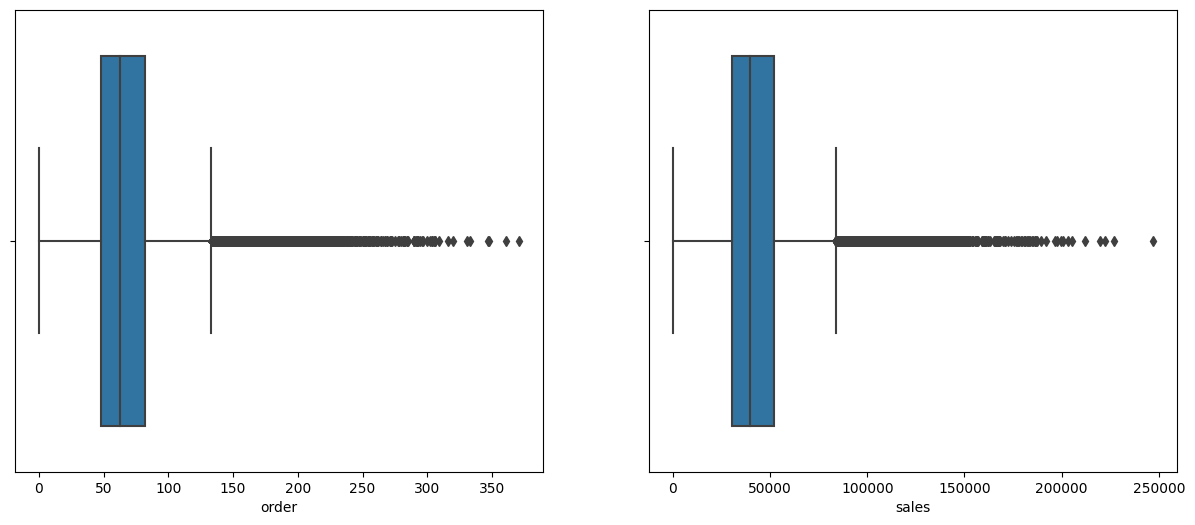

In [44]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x = df['order'])
plt.subplot(1, 2, 2)
sns.boxplot(x = df['sales'])
plt.show()

#### There are outliers in order and sales column

In [34]:
df["discount"] = df["discount"].map({"No": 0, "Yes": 1})
df["store_type"] = df["store_type"].map({"S1": 1, "S2": 2, "S3": 3, "S4": 4})
df["location_type"] = df["location_type"].map({"L1": 1, "L2": 2, "L3": 3, "L4": 4, "L5": 5})
df.dropna()

x = df[["store_type", "location_type", "holiday", "discount"]]
y = df["order"]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)                                    

In [36]:
X_train

,store_type,location_type,holiday,discount
50438,2,3,0,0
178932,3,1,0,0
173991,4,1,0,0
14666,1,1,1,1
30679,1,1,0,0
...,...,...,...,...
119879,4,2,0,1
103694,4,1,0,1
131932,1,1,0,1
146867,1,3,0,1


In [37]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [38]:
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
enet=ElasticNet().fit(X_train,y_train)
knn=KNeighborsRegressor().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)

In [39]:
dtc=DecisionTreeRegressor().fit(X_train,y_train)

In [40]:
from xgboost import XGBRegressor

In [41]:
rf=RandomForestRegressor().fit(X_train,y_train)
xgb=XGBRegressor().fit(X_train,y_train)

In [42]:
models=[ridge,lasso,enet,knn,ada,dtc,rf,xgb]

In [43]:
def ML(y,models):
    accuary=models.score(X_train,y_train)
    return accuary

In [44]:
for i in models:
     print(i,"Algorithm succed rate :",ML("order",i))

Ridge() Algorithm succed rate : 0.4527777468018406
Lasso() Algorithm succed rate : 0.43746710461834537
ElasticNet() Algorithm succed rate : 0.38435886063836144
KNeighborsRegressor() Algorithm succed rate : 0.5324814760548391
AdaBoostRegressor() Algorithm succed rate : 0.47981439217212907
DecisionTreeRegressor() Algorithm succed rate : 0.5934361106193803
RandomForestRegressor() Algorithm succed rate : 0.5934350191983003
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=Non